In [1]:
import pandas as pd
from Bio import Restriction, SeqIO
from ntaxon.fingerprinting.rflp import RestrictionDigestion
import os
import pandas as pd

In [2]:
combined_seq = pd.read_csv('./data/combined_seq.csv')
combined_seq.head()

,accession,species,sequence,remark,name
0,MN513225.1,Alcaligenes faecalis,ATTGAACGCTAGCGGGATGCTTTACACATGCAAGTCGAACGGCAGC...,R,R_MN513225.1
1,JF710959.1,Alcaligenes faecalis,TACACATGCAAGTCGAACGGCAGCACGAGAGAGCTTGCTCTCTTGG...,R,R_JF710959.1
2,KT988067.1,Alcaligenes faecalis,ATTGAACGCTAGCGGGATGCTTTACACATGCAAGTCGAACGGCAGC...,R,R_KT988067.1
3,KP224304.1,Alcaligenes faecalis,GAGTTTGATCCTGGCTCAGATTGAACGCTAGCGGGATGCTTTACAC...,R,R_KP224304.1
4,KF534470.1,Alcaligenes faecalis,GAGTTTGATCCTGGCTCAGATTGAACGCTAGCGGGATGCTTTACAC...,R,R_KF534470.1


In [3]:
list(combined_seq['species'].sort_values().unique())

['Achromobacter marplatensis',
 'Acinetobacter lwoffii',
 'Acinetobacter radioresistens',
 'Acinetobacter rudis',
 'Advenella kashmirensis',
 'Alcaligenes faecalis',
 'Bacillus aerius',
 'Bacillus aryabhattai',
 'Bacillus cereus',
 'Bacillus haynesii',
 'Bacillus kochii',
 'Bacillus licheniformis',
 'Bacillus pseudomycoides',
 'Bacillus safensis',
 'Bacillus subtilis',
 'Bacillus velezensis',
 'Bacillus weidmannii',
 'Bacillus wiedmannii',
 'Brevibacillus agri',
 'Brevibacillus agrii',
 'Brevundimonas diminuta',
 'Brevundimonas naejangsanensis',
 'Curtobacterium oceanosedimentum',
 'Exiguobacterium aquaticum',
 'Janibacter melonis',
 'Lysinibacillus fusiformis',
 'Ochrobactrum anthropi',
 'Ochrobactrum pseudogrignonense',
 'Ochrobactrum pseudogrignonense  ',
 'Paenibacillus lautus',
 'Paenibacillus taichungensis',
 'Planococcus massiliensis',
 'Pseudomonas parafulva',
 'Pseudomonas putida',
 'Pseudomonas umsongensis',
 'Rhodococcus qingshengii',
 'Serratia marcescens',
 'Sporosarcina g

# Species Haplotype Screening

In [115]:
species_list = ['Achromobacter marplatensis','Acinetobacter rudis','Advenella kashmirensis','Alcaligenes faecalis','Bacillus aerius','Bacillus aryabhattai','Bacillus cereus','Bacillus haynesii','Bacillus kochii','Bacillus licheniformis','Bacillus pseudomycoides','Bacillus safensis','Bacillus subtilis','Bacillus velezensis','Bacillus weidmannii','Brevibacillus agrii','Brevundimonas diminuta','Brevundimonas naejangsanensis','Curtobacterium oceanosedimentum','Exiguobacterium aquaticum','Janibacter melonis','Lysinibacillus fusiformis','Ochrobactrum anthropi','Ochrobactrum pseudogrignonense  ','Paenibacillus lautus','Paenibacillus taichungensis','Planococcus massiliensis','Pseudomonas putida','Pseudomonas umsongensis','Rhodococcus qingshengii','Serratia marcescens','Sporosarcina globispora','Sporosarcina koreensis','Sporosarcina koreensis ','Stenotrophomonas maltophilia','Stenotrophomonas pavanii','Stenotrophomonas rhizophilia']

In [132]:
def get_haplotypes(species):
    sp_sequences = combined_seq[combined_seq['species'] == species]
    mspI_digestion = RestrictionDigestion(
        accessions=sp_sequences, 
        enzyme=Restriction.HpaII, 
        label_col="name",
        sequence_col="sequence"
    )
    matrix_bin = mspI_digestion.binary_matrix
    #matrix_bin = matrix_bin.filter_size(50)
    matrix_bin = matrix_bin.apply_tolerance(2)
    
    return matrix_bin.get_haplotypes(
        size_tolerance=2,
        allow_polymorphism=0
    )

haplo_screened = []

for s in species_list:
    h = get_haplotypes(s)
    haplo_screened.append([s, h])
    
hdf = pd.DataFrame(haplo_screened, columns=['species', 'haplotypes'])    
hdf

,species,haplotypes
0,Achromobacter marplatensis,"[118_1, 130_1, 81_1]"
1,Acinetobacter rudis,"[799_1, 81_1]"
2,Advenella kashmirensis,"[122_1, 130_1, 81_1]"
3,Alcaligenes faecalis,"[118_1, 81_1]"
4,Bacillus aerius,"[211_1, 391_1, 538_1, 60_1]"
5,Bacillus aryabhattai,"[211_1, 389_1, 608_1]"
6,Bacillus cereus,"[211_1, 390_1, 606_1]"
7,Bacillus haynesii,"[211_1, 391_1, 538_1, 59_1]"
8,Bacillus kochii,"[163_1, 304_1, 608_1, 84_1]"
9,Bacillus licheniformis,"[211_1, 391_1, 59_1]"


In [133]:
hdf['haplotype_sizes'] = hdf.apply(lambda x: [i.split('_')[0] for i in x.haplotypes], axis=1)
hdf.head()

,species,haplotypes,haplotype_sizes
0,Achromobacter marplatensis,"[118_1, 130_1, 81_1]","[118, 130, 81]"
1,Acinetobacter rudis,"[799_1, 81_1]","[799, 81]"
2,Advenella kashmirensis,"[122_1, 130_1, 81_1]","[122, 130, 81]"
3,Alcaligenes faecalis,"[118_1, 81_1]","[118, 81]"
4,Bacillus aerius,"[211_1, 391_1, 538_1, 60_1]","[211, 391, 538, 60]"


In [134]:
hdf.to_csv('./outputs/haplotypes_sp_hpaII.csv')

# Start Specific Haplotype Analysis

In [109]:
#Analyse Species Wise
SPECIES = 'Lysinibacillus fusiformis'

In [110]:
# Filter sample sequences
sp_sequences = combined_seq[combined_seq['species'] == SPECIES]
sp_sequences.head()

,accession,species,sequence,remark,name
23,MW530945.1,Lysinibacillus fusiformis,CCTGGCTCAGGACGAACGCTGGCGGCGTGCCTAATACATGCAAGTC...,R,R_MW530945.1
24,KJ722467.1,Lysinibacillus fusiformis,TTCCTGCTCAGGACGAACGCTGGCGGCGTGCCTAATACATGCAAGT...,R,R_KJ722467.1
25,EU545408.1,Lysinibacillus fusiformis,GATTAGAGTTTGATCCTGGCTCAGGACGAACGCTGGCGGCGTGCCT...,R,R_EU545408.1
175,NR_112628.1,Lysinibacillus fusiformis,GACGAACGCTGGCGGCGTGCCTAATACATGCAAGTCGAGCGAACAG...,R,R_NR_112628.1
176,NR_112569.1,Lysinibacillus fusiformis,GACGAACGCTGGCGGCGTGCCTAATACATGCAAGTCGAGCGAACAG...,R,R_NR_112569.1


In [111]:
ref_accessions = list(sp_sequences[sp_sequences['remark'] == 'R']['name'])
print(ref_accessions)

['R_MW530945.1', 'R_KJ722467.1', 'R_EU545408.1', 'R_NR_112628.1', 'R_NR_112569.1', 'R_NR_042072.1']


In [112]:
# Perform restriction Digestion
mspI_digestion = RestrictionDigestion(
    accessions=sp_sequences, 
    enzyme=Restriction.MspI, 
    label_col="name",
    sequence_col="sequence"
)

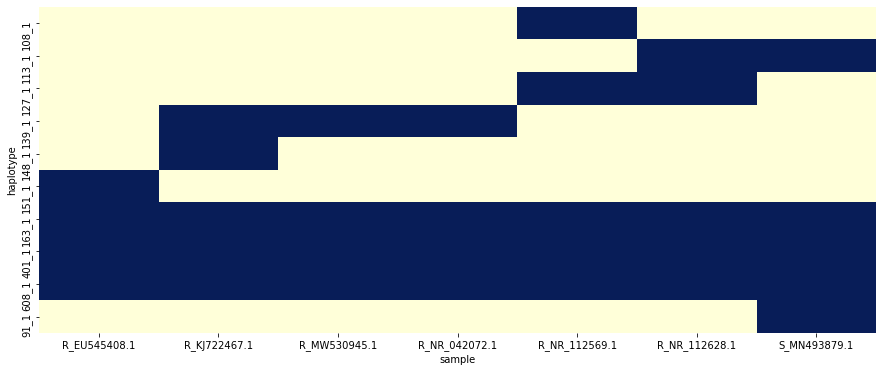

In [113]:
matrix_bin = mspI_digestion.binary_matrix
#matrix_bin = matrix_bin.filter_size(50)
matrix_bin = matrix_bin.apply_tolerance(2)
matrix_bin.plot_electrophoretic_diagram(
    figsize=(15, 6),
    #exclude=['R_NR_114422.1',],
    #exclude=ref_accessions,
)

In [114]:
matrix_bin.get_haplotypes(
    size_tolerance=6,
    #exclude=['R_MT012197.1', 'R_NR_075005.2',],
    #exclude=ref_accessions,
    allow_polymorphism=0
)

['163_1', '401_1', '608_1']